METRIC FOR SUCCESS

IMPORTING THE RELEVANT LIBRARIES

In [ ]:
#Let's import python libraries that we rely on to find a solution for the project11 
#import numpy library
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from sklearn.cluster import KMeans


**LOADING OUR DATASETS**

In [ ]:
#First we will download the datasets then upload them
#LOADING OUR DATASETs
#loading the first dataset,to preview it
df1 = pd.read_csv('/content/Telcom_dataset.csv')
df1.head()



,PRODUTC,VALUE,DATETIME,CELL_ON_SITE,DW_A_NUMBER_INT,DW_B_NUMBER_INT,COUNTRY_A,COUNTRY_B,CELL_ID,SITE_ID
0,Voice,0,2012-05-06 23:04:37.0,1,49fae048b547780,1a49f8b0ded9de6,19e2e,19e2e,/TJNe+Mmtu,/TJNe+Mmtu
1,sms,0,2012-05-06 23:05:25.0,0,7a54a6eaee19e65,93343ba6e41af95,19e2e,19e2e,/+cKZKIp41,/+cKZKIp41
2,sms,25,2012-05-06 23:05:41.0,0,6008887b0207d82,7aacc9709ce0a20,19e2e,19e2e,/u0FSD+ahi,/u0FSD+ahi
3,Voice,56,2012-05-06 23:05:42.0,1,7370032e20f4e96,6af4a60e74c91d3,19e2e,19e2e,+cNeJzsTp3,+cNeJzsTp3
4,Voice,14,2012-05-06 23:06:29.0,1,966ba4656e38e62,02aa736ee555d5c,19e2e,19e2e,051KhYDCpv,051KhYDCpv


In [ ]:
#loading the second telcom dataset
df2=pd.read_csv('/content/Telcom_dataset2.csv')
df2.head()

,PRODUCT,VALUE,DATE_TIME,CELL_ON_SITE,DW_A_NUMBER,DW_B_NUMBER,COUNTRY_A,COUNTRY_B,CELL_ID,SITE_ID
0,sms,0,2012-05-07 23:02:06.0,2,32255675c3b6fe3,1aa7ae01386e9fb,19e2e,19e2e,+854AcBQT2,+854AcBQT2
1,Voice,0,2012-05-07 23:03:44.0,1,ff16d6ac74c1c64,87d87309c15a8c9,19e2e,19e2e,+854AcBQT2,+854AcBQT2
2,sms,0,2012-05-07 23:04:06.0,0,98d9f2fb5ff624b,93343ba6e41af95,19e2e,19e2e,+laSrk7g6q,+laSrk7g6q
3,Voice,37,2012-05-07 23:04:48.0,1,3f9c8a33ec7be1f,7d05a38f89c49d8,19e2e,19e2e,/xvRrCVKoQ,/xvRrCVKoQ
4,sms,25,2012-05-07 23:04:58.0,1,7bcccc03adf3864,56a5d5430d2fa86,19e2e,19e2e,+bO+qkSonO,+bO+qkSonO


In [ ]:
#loading the 3rd telcom dataset,to preview it

df3=pd.read_csv('/content/Telcom_dataset3.csv')
df3.head()

,PRODUCT,VALUE,DATE_TIME,CELL_ON_SITE,DW_A_NUMBER_INT,DW_B_NUMBER_INT,COUNTRY_A,COUNTRY_B,CELLID,SIET_ID
0,Voice,61,2012-05-08 23:01:28.0,2,966f68353622feb,ffd53a3bb2db6f1,19e2e,19e2e,+38u2u/rfx,+38u2u/rfx
1,sms,0,2012-05-08 23:01:31.0,1,a0a597384c612d7,cf3b218f1dde792,19e2e,19e2e,+Fs4mTvdKx,+Fs4mTvdKx
2,Voice,10,2012-05-08 23:02:59.0,1,5441a9a58c97132,52f8b299515b9b7,19e2e,19e2e,+ZaaZozy/+,+ZaaZozy/+
3,sms,0,2012-05-08 23:03:04.0,0,8ab8b9ed6989f61,e09e736e46c5c3d,19e2e,19e2e,+cNeJzsTp3,+cNeJzsTp3
4,Voice,22,2012-05-08 23:03:16.0,4,52662a62b199334,2186273faab4602,19e2e,19e2e,/eeMklgyJA,/eeMklgyJA


In [ ]:
#loading the 4th dataset
#loading cells_geo_csv to previw it

df4=pd.read_csv('/content/cells_geo.csv' , delimiter=";")
df4

,Unnamed: 0,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_CODE
0,0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,fbb2e75af3,0bb492ef17
1,1,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,1502501d78,0bb492ef17
2,2,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,0c2e182a0c,0bb492ef17
3,3,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,69bdfc69fd,8a1e6ce31f
4,4,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,7a1029d2ab,8a1e6ce31f
...,...,...,...,...,...,...,...,...,...,...,...,...
3969,3969,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.039694,7.428611,MARAHOUE,CENTRE NORTH,1cfc2d7ab1,f91ed8d2e9
3970,3970,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.039694,7.428611,MARAHOUE,CENTRE NORTH,3ae1708153,f91ed8d2e9
3971,3971,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.065450,7.444592,MARAHOUE,CENTRE NORTH,cb71f8a29c,61bee9c70c
3972,3972,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.065450,7.444592,MARAHOUE,CENTRE NORTH,d4a6a0b645,61bee9c70c


In [ ]:
#Dropping the unnamed column from the fourth dataset using .drop function

df4.drop('Unnamed: 0', axis=1, inplace=True)
df4



,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_CODE
0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,fbb2e75af3,0bb492ef17
1,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,1502501d78,0bb492ef17
2,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,0c2e182a0c,0bb492ef17
3,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,69bdfc69fd,8a1e6ce31f
4,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,7a1029d2ab,8a1e6ce31f
...,...,...,...,...,...,...,...,...,...,...,...
3969,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.039694,7.428611,MARAHOUE,CENTRE NORTH,1cfc2d7ab1,f91ed8d2e9
3970,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.039694,7.428611,MARAHOUE,CENTRE NORTH,3ae1708153,f91ed8d2e9
3971,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.065450,7.444592,MARAHOUE,CENTRE NORTH,cb71f8a29c,61bee9c70c
3972,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.065450,7.444592,MARAHOUE,CENTRE NORTH,d4a6a0b645,61bee9c70c


In [ ]:
#loading the 5th dataset,cells_geo_description

url='/content/cells_geo_description.xlsx'
df5=pd.read_excel(url, sheet_name=0, header=0)
df5

,Column name,Description,Format
0,VILLES,City,String
1,STATUS,In Service or not,String
2,LOCALISATION,in ABIDJAN or not,String
3,DECOUPZONE,Geographical Zone,String
4,ZONENAME,Name of Zone,String
5,LONGITUDE,Longitude,Float
6,LATITUDE,Latitude,Float
7,REGION,Region,String
8,AREA,Area,String
9,CELL_ID,ID of the cell,String


In [ ]:
#loading our 6th dataset CDR_DESCRIPTION.XLSV

url='/content/CDR_description.xlsx'
df6=pd.read_excel(url, sheet_name=0, header=0)
df6


,Column name,Description,Format
0,PRODUCT,Voice or SMS,String
1,VALUE,Billing price,Integer
2,DATE_TIME,Time in format yyyy-MM-dd hh:mm:ss.0,String
3,CELL_ON_SITE,Which cell in the site was used (not needed here),Integer
4,DW_A_NUMBER_INT,Anonymized phone number of the person for whic...,String
5,DW_B_NUMBER_INT,Anonymized phone number of the counterparty,String
6,COUNTRY_A,Country of party A (useless here),String
7,COUNTRY_B,Country of party B (useless here),String
8,CELL_ID,ID of the cell,String
9,SITE_ID,ID of the SITE,String


**DATA EXPLORATION**

In [ ]:
#renaming column names in df1 PRODUTC TO PROCUCT AND DATETIME TO DATE_TIME
#df1 = pd.read_csv('/content/Telcom_dataset.csv')
#df1

df1.columns=['PRODUCT', 'BILL', 'DATE_TIME', 'CELL_ON_SITE', 'ANONYMIZED_CELL', 'RECIPIENT_ANONYMIZED', 'COUNTRY-A', 'COUNTRY_B', 'CELL_ID', 'SITE_ID']

df1


,PRODUCT,BILL,DATE_TIME,CELL_ON_SITE,ANONYMIZED_CELL,RECIPIENT_ANONYMIZED,COUNTRY-A,COUNTRY_B,CELL_ID,SITE_ID
0,Voice,0,2012-05-06 23:04:37.0,1,49fae048b547780,1a49f8b0ded9de6,19e2e,19e2e,/TJNe+Mmtu,/TJNe+Mmtu
1,sms,0,2012-05-06 23:05:25.0,0,7a54a6eaee19e65,93343ba6e41af95,19e2e,19e2e,/+cKZKIp41,/+cKZKIp41
2,sms,25,2012-05-06 23:05:41.0,0,6008887b0207d82,7aacc9709ce0a20,19e2e,19e2e,/u0FSD+ahi,/u0FSD+ahi
3,Voice,56,2012-05-06 23:05:42.0,1,7370032e20f4e96,6af4a60e74c91d3,19e2e,19e2e,+cNeJzsTp3,+cNeJzsTp3
4,Voice,14,2012-05-06 23:06:29.0,1,966ba4656e38e62,02aa736ee555d5c,19e2e,19e2e,051KhYDCpv,051KhYDCpv
...,...,...,...,...,...,...,...,...,...,...
4996,sms,100,2012-05-07 00:01:54.0,0,92e367d671f45c5,38811081cf82c90,19e2e,OTHER,0c2371d9bc,1e751d08a4
4997,Voice,1,2012-05-07 00:01:54.0,1,83b44b18238e602,6ec63d4aa5de5dd,19e2e,19e2e,5fb791cf56,65efe2bc62
4998,Voice,0,2012-05-07 00:01:54.0,1,49fae048b547780,1a49f8b0ded9de6,19e2e,19e2e,7773627c12,9ef9616350
4999,Voice,0,2012-05-07 00:01:54.0,0,a1613f1a992716a,bd663f07b6c8bcd,19e2e,19e2e,3f4af49d6c,969b8d0e39


In [ ]:
#renaming the column names in dataframe 2
df2.columns=['PRODUCT', 'BILL', 'DATE_TIME', 'CELL_ON_SITE', 'ANONYMIZED_CELL', 'RECIPIENT_ANONYMIZED', 'COUNTRY-A', 'COUNTRY_B', 'CELL_ID', 'SITE_ID']

df2.head()

,PRODUCT,BILL,DATE_TIME,CELL_ON_SITE,ANONYMIZED_CELL,RECIPIENT_ANONYMIZED,COUNTRY-A,COUNTRY_B,CELL_ID,SITE_ID
0,sms,0,2012-05-07 23:02:06.0,2,32255675c3b6fe3,1aa7ae01386e9fb,19e2e,19e2e,+854AcBQT2,+854AcBQT2
1,Voice,0,2012-05-07 23:03:44.0,1,ff16d6ac74c1c64,87d87309c15a8c9,19e2e,19e2e,+854AcBQT2,+854AcBQT2
2,sms,0,2012-05-07 23:04:06.0,0,98d9f2fb5ff624b,93343ba6e41af95,19e2e,19e2e,+laSrk7g6q,+laSrk7g6q
3,Voice,37,2012-05-07 23:04:48.0,1,3f9c8a33ec7be1f,7d05a38f89c49d8,19e2e,19e2e,/xvRrCVKoQ,/xvRrCVKoQ
4,sms,25,2012-05-07 23:04:58.0,1,7bcccc03adf3864,56a5d5430d2fa86,19e2e,19e2e,+bO+qkSonO,+bO+qkSonO


In [ ]:
#RENAMING THE COLUMN NAMES IN DATAFRAME 3

df3.columns=['PRODUCT', 'BILL', 'DATE_TIME', 'CELL_ON_SITE', 'ANONYMIZED_CELL', 'RECIPIENT_ANONYMIZED', 'COUNTRY-A', 'COUNTRY_B', 'CELL_ID', 'SITE_ID']

df3

,PRODUCT,BILL,DATE_TIME,CELL_ON_SITE,ANONYMIZED_CELL,RECIPIENT_ANONYMIZED,COUNTRY-A,COUNTRY_B,CELL_ID,SITE_ID
0,Voice,61,2012-05-08 23:01:28.0,2,966f68353622feb,ffd53a3bb2db6f1,19e2e,19e2e,+38u2u/rfx,+38u2u/rfx
1,sms,0,2012-05-08 23:01:31.0,1,a0a597384c612d7,cf3b218f1dde792,19e2e,19e2e,+Fs4mTvdKx,+Fs4mTvdKx
2,Voice,10,2012-05-08 23:02:59.0,1,5441a9a58c97132,52f8b299515b9b7,19e2e,19e2e,+ZaaZozy/+,+ZaaZozy/+
3,sms,0,2012-05-08 23:03:04.0,0,8ab8b9ed6989f61,e09e736e46c5c3d,19e2e,19e2e,+cNeJzsTp3,+cNeJzsTp3
4,Voice,22,2012-05-08 23:03:16.0,4,52662a62b199334,2186273faab4602,19e2e,19e2e,/eeMklgyJA,/eeMklgyJA
...,...,...,...,...,...,...,...,...,...,...
4996,Voice,0,2012-05-09 00:01:43.0,3,467333ade2b4b9c,0ab2acd804d01fe,19e2e,19e2e,2aa04dcab7,f7d63a29e5
4997,Voice,62,2012-05-09 00:01:43.0,1,e077a6b74c5053c,4c8098eb6ea1a41,19e2e,19e2e,7f1f2f889f,b4ddb9e93c
4998,Voice,32,2012-05-09 00:01:43.0,1,77f53c39d27c050,9d064f013e2cab2,19e2e,19e2e,a4731e780e,d68260ef50
4999,Voice,30,2012-05-09 00:01:43.0,2,672ce74c418aa7a,f9ff5af59cf0d68,19e2e,19e2e,98ed726da2,b4130b54ab


In [ ]:
#droppig the columns that wont be useful during the analysis
#the attribute values of country_a and country b are similar and we could drop one of them
#the attribute values in cell_on site could also be concluded from the values in cell_id

#dropping the unecessary columns

drop = ['CELL_ON_SITE', 'COUNTRY-A', 'COUNTRY_B']
df1.drop(drop, axis=1, inplace=True)
df2.drop(drop, axis=1, inplace=True)
df3.drop(drop, axis=1, inplace=True)





In [ ]:
#previewing the datasets after dropping the columns
df1.head()

,PRODUCT,BILL,DATE_TIME,ANONYMIZED_CELL,RECIPIENT_ANONYMIZED,CELL_ID,SITE_ID
0,Voice,0,2012-05-06 23:04:37.0,49fae048b547780,1a49f8b0ded9de6,/TJNe+Mmtu,/TJNe+Mmtu
1,sms,0,2012-05-06 23:05:25.0,7a54a6eaee19e65,93343ba6e41af95,/+cKZKIp41,/+cKZKIp41
2,sms,25,2012-05-06 23:05:41.0,6008887b0207d82,7aacc9709ce0a20,/u0FSD+ahi,/u0FSD+ahi
3,Voice,56,2012-05-06 23:05:42.0,7370032e20f4e96,6af4a60e74c91d3,+cNeJzsTp3,+cNeJzsTp3
4,Voice,14,2012-05-06 23:06:29.0,966ba4656e38e62,02aa736ee555d5c,051KhYDCpv,051KhYDCpv


In [ ]:
#3preview dataset 2
df2.head()

,PRODUCT,BILL,DATE_TIME,ANONYMIZED_CELL,RECIPIENT_ANONYMIZED,CELL_ID,SITE_ID
0,sms,0,2012-05-07 23:02:06.0,32255675c3b6fe3,1aa7ae01386e9fb,+854AcBQT2,+854AcBQT2
1,Voice,0,2012-05-07 23:03:44.0,ff16d6ac74c1c64,87d87309c15a8c9,+854AcBQT2,+854AcBQT2
2,sms,0,2012-05-07 23:04:06.0,98d9f2fb5ff624b,93343ba6e41af95,+laSrk7g6q,+laSrk7g6q
3,Voice,37,2012-05-07 23:04:48.0,3f9c8a33ec7be1f,7d05a38f89c49d8,/xvRrCVKoQ,/xvRrCVKoQ
4,sms,25,2012-05-07 23:04:58.0,7bcccc03adf3864,56a5d5430d2fa86,+bO+qkSonO,+bO+qkSonO


In [ ]:
df3.head()

,PRODUCT,BILL,DATE_TIME,ANONYMIZED_CELL,RECIPIENT_ANONYMIZED,CELL_ID,SITE_ID
0,Voice,61,2012-05-08 23:01:28.0,966f68353622feb,ffd53a3bb2db6f1,+38u2u/rfx,+38u2u/rfx
1,sms,0,2012-05-08 23:01:31.0,a0a597384c612d7,cf3b218f1dde792,+Fs4mTvdKx,+Fs4mTvdKx
2,Voice,10,2012-05-08 23:02:59.0,5441a9a58c97132,52f8b299515b9b7,+ZaaZozy/+,+ZaaZozy/+
3,sms,0,2012-05-08 23:03:04.0,8ab8b9ed6989f61,e09e736e46c5c3d,+cNeJzsTp3,+cNeJzsTp3
4,Voice,22,2012-05-08 23:03:16.0,52662a62b199334,2186273faab4602,/eeMklgyJA,/eeMklgyJA


**Checking for missing values and handling null values**

In [ ]:
#checking null values in dataset 1(df1)

df1.isnull().sum().sort_values(ascending=False)




SITE_ID                 716
CELL_ID                   0
RECIPIENT_ANONYMIZED      0
ANONYMIZED_CELL           0
DATE_TIME                 0
BILL                      0
PRODUCT                   0
dtype: int64

In [ ]:
#checking for null values in df2
df2.isnull().sum().sort_values(ascending=False)

SITE_ID                 676
CELL_ID                   0
RECIPIENT_ANONYMIZED      0
ANONYMIZED_CELL           0
DATE_TIME                 0
BILL                      0
PRODUCT                   0
dtype: int64

In [ ]:
#checking for null values in df3 
df3.isnull().sum().sort_values(ascending=False)

SITE_ID                 605
CELL_ID                   0
RECIPIENT_ANONYMIZED      0
ANONYMIZED_CELL           0
DATE_TIME                 0
BILL                      0
PRODUCT                   0
dtype: int64

In [ ]:
#checking for nul values in df4
df4.isnull().sum().sort_values(ascending=False)

STATUS          67
AREA            23
ZONENAME         6
SITE_CODE        0
CELL_ID          0
REGION           0
LATITUDE         0
LONGITUDE        0
DECOUPZONE       0
LOCALISATION     0
VILLES           0
dtype: int64

In [ ]:
#checking for null values in df5

df5.isnull().sum().sort_values(ascending=False)

Format         0
Description    0
Column name    0
dtype: int64

In [ ]:
#checkinh for null values in df6
df6.isnull().sum().sort_values(ascending=False)

Format         0
Description    0
Column name    0
dtype: int64

**Checking for duplicate values**

In [ ]:
#checking for duplicate values in df1

df1.duplicated().value_counts()


False    4919
True       82
dtype: int64

In [ ]:
#checking for duplicate values in df2

df2.duplicated().value_counts()

False    4923
True       78
dtype: int64

In [ ]:
#checking for duplicate values in df3

df3.duplicated().value_counts()

False    4908
True       93
dtype: int64

In [ ]:
#checking for duplicate values in df4

df4.duplicated().value_counts()

False    3931
True       43
dtype: int64

In [ ]:
#checking for duplicate values in df5

df5.duplicated().value_counts()

False    11
dtype: int64

In [ ]:
#checking for duplicate values in df6

df6.duplicated().value_counts()

False    10
dtype: int64

In [ ]:
#dropping the duplicate values
df4.drop_duplicates(inplace=True)
df5.drop_duplicates(inplace=True)
df6.drop_duplicates(inplace=True)

In [ ]:
#merging the theree datasets

joined_table=pd.concat( [df1, df2, df3] , ignore_index=1)
joined_table

,PRODUCT,BILL,DATE_TIME,ANONYMIZED_CELL,RECIPIENT_ANONYMIZED,CELL_ID,SITE_ID
0,Voice,0,2012-05-06 23:04:37.0,49fae048b547780,1a49f8b0ded9de6,/TJNe+Mmtu,/TJNe+Mmtu
1,sms,0,2012-05-06 23:05:25.0,7a54a6eaee19e65,93343ba6e41af95,/+cKZKIp41,/+cKZKIp41
2,sms,25,2012-05-06 23:05:41.0,6008887b0207d82,7aacc9709ce0a20,/u0FSD+ahi,/u0FSD+ahi
3,Voice,56,2012-05-06 23:05:42.0,7370032e20f4e96,6af4a60e74c91d3,+cNeJzsTp3,+cNeJzsTp3
4,Voice,14,2012-05-06 23:06:29.0,966ba4656e38e62,02aa736ee555d5c,051KhYDCpv,051KhYDCpv
...,...,...,...,...,...,...,...
14998,Voice,0,2012-05-09 00:01:43.0,467333ade2b4b9c,0ab2acd804d01fe,2aa04dcab7,f7d63a29e5
14999,Voice,62,2012-05-09 00:01:43.0,e077a6b74c5053c,4c8098eb6ea1a41,7f1f2f889f,b4ddb9e93c
15000,Voice,32,2012-05-09 00:01:43.0,77f53c39d27c050,9d064f013e2cab2,a4731e780e,d68260ef50
15001,Voice,30,2012-05-09 00:01:43.0,672ce74c418aa7a,f9ff5af59cf0d68,98ed726da2,b4130b54ab


**merging df4,df5,df6**

In [ ]:
merged_table=pd.concat([df4,df5,df6], axis=0, join='outer',ignore_index=True)
merged_table.head()

,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_CODE,Column name,Description,Format
0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,fbb2e75af3,0bb492ef17,NaN,NaN,NaN
1,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,1502501d78,0bb492ef17,NaN,NaN,NaN
2,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,0c2e182a0c,0bb492ef17,NaN,NaN,NaN
3,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,69bdfc69fd,8a1e6ce31f,NaN,NaN,NaN
4,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,7a1029d2ab,8a1e6ce31f,NaN,NaN,NaN


In [ ]:
merged_table.head()

,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_CODE,Column name,Description,Format
0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,fbb2e75af3,0bb492ef17,NaN,NaN,NaN
1,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,1502501d78,0bb492ef17,NaN,NaN,NaN
2,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,0c2e182a0c,0bb492ef17,NaN,NaN,NaN
3,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,69bdfc69fd,8a1e6ce31f,NaN,NaN,NaN
4,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,7a1029d2ab,8a1e6ce31f,NaN,NaN,NaN


**Dropping columns with null values**

In [ ]:
#dropping columns with null values from the merged table

drop=['Column name','Description', 'Format']
merged_table.drop(drop, axis=1, inplace=True)
merged_table

,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_CODE
0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,fbb2e75af3,0bb492ef17
1,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,1502501d78,0bb492ef17
2,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,0c2e182a0c,0bb492ef17
3,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,69bdfc69fd,8a1e6ce31f
4,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,7a1029d2ab,8a1e6ce31f
...,...,...,...,...,...,...,...,...,...,...,...
3947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Dropping rows with null values**

In [ ]:
#dropping all rows with null values

merged_table.drop(merged_table.tail().index,inplace=True)
merged_table

,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_CODE
0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,fbb2e75af3,0bb492ef17
1,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,1502501d78,0bb492ef17
2,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,0c2e182a0c,0bb492ef17
3,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,69bdfc69fd,8a1e6ce31f
4,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,7a1029d2ab,8a1e6ce31f
...,...,...,...,...,...,...,...,...,...,...,...
3942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged_df= pd.merge(joined_table, merged_table, how='inner', left_on=['SITE_ID'], right_on=['SITE_CODE'])
merged_df

,PRODUCT,BILL,DATE_TIME,ANONYMIZED_CELL,RECIPIENT_ANONYMIZED,CELL_ID_x,SITE_ID,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID_y,SITE_CODE
0,sms,0,2012-05-07 00:00:00.0,8118c3aa53d6c7b,1d103ea638ad1f0,5d9dc897f7,1b5540c02d,BOUAKE,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-5.027139,7.718417,VALLEE DU BANDAMA,CENTRE NORTH,24ccdda3d5,1b5540c02d
1,sms,0,2012-05-07 00:00:00.0,8118c3aa53d6c7b,1d103ea638ad1f0,5d9dc897f7,1b5540c02d,BOUAKE,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-5.027139,7.718417,VALLEE DU BANDAMA,CENTRE NORTH,ebfc58af70,1b5540c02d
2,sms,0,2012-05-07 00:00:00.0,8118c3aa53d6c7b,1d103ea638ad1f0,5d9dc897f7,1b5540c02d,BOUAKE,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-5.027139,7.718417,VALLEE DU BANDAMA,CENTRE NORTH,ba8ce6e4ef,1b5540c02d
3,sms,0,2012-05-07 00:00:00.0,8118c3aa53d6c7b,1d103ea638ad1f0,5d9dc897f7,1b5540c02d,BOUAKE,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-5.027139,7.718417,VALLEE DU BANDAMA,CENTRE NORTH,c2545171dc,1b5540c02d
4,sms,0,2012-05-07 00:00:00.0,8118c3aa53d6c7b,1d103ea638ad1f0,5d9dc897f7,1b5540c02d,BOUAKE,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-5.027139,7.718417,VALLEE DU BANDAMA,CENTRE NORTH,f15bd5483f,1b5540c02d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82678,Voice,17,2012-05-09 00:01:42.0,22e493a92442b73,c9e2c9c2fa3795a,2f50f4a1fb,cc45940406,ADJAME,In Service,ABIDJAN,Abidjan_CENTRE,ZONE B - Abidjan_CENTRE,-4.023247,5.349442,LAGUNE,ABIDJAN NORTH,c179f33d5e,cc45940406
82679,Voice,17,2012-05-09 00:01:42.0,22e493a92442b73,c9e2c9c2fa3795a,2f50f4a1fb,cc45940406,ADJAME,In Service,ABIDJAN,Abidjan_CENTRE,ZONE B - Abidjan_CENTRE,-4.023247,5.349442,LAGUNE,ABIDJAN NORTH,0a3f751619,cc45940406
82680,sms,0,2012-05-09 00:01:43.0,32e2e7c90a9b0e9,32e2e7c90a9b0e9,25c671778e,ab91f5b21d,DIABO,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-5.171778,7.777056,VALLEE DU BANDAMA,CENTRE NORTH,0427a26d34,ab91f5b21d
82681,sms,0,2012-05-09 00:01:43.0,32e2e7c90a9b0e9,32e2e7c90a9b0e9,25c671778e,ab91f5b21d,DIABO,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-5.171778,7.777056,VALLEE DU BANDAMA,CENTRE NORTH,7c72293cf2,ab91f5b21d


In [ ]:
#to preview our merged dataframe
merged_df.shape

(82683, 18)

**zones with highest traffic**

In [ ]:
merged_df['ZONENAME'].value_counts()

ZONE C - Abidjan_OUEST     10509
ZONE E - Abidjan_NORD       6800
ZONE B - Grand-SUD          5667
ZONE B - Abidjan_EST        4946
ZONE D - Abidjan_SUD        4789
ZONE D - Grand-OUEST        4371
ZONE A - Abidjan_CENTRE     4226
ZONE A - Grand-NORD         3975
ZONE E - SUD-OUEST          3070
ZONE C - Grand-EST          1772
ZONE D - Abidjan_EST         186
OKAHOTEL                     120
NPONON                        72
WILLIAMSVILLE2                40
ZONE C - Abidjan_EST          27
PALMABINGERVILLE              21
ZONE A - Abidjan_OUEST        21
ZONE B - Grand-EST            18
ZONE A - Grand-SUD            18
ZONE B - Abidjan_OUEST        18
ZONE C - Abidjan_SUD          15
ZONE B - Abidjan_SUD           6
ZONE D - Grand-SUD             6
ZONE A - Grand-EST             6
AGBANNEW                       3
ZONE B - Grand-NORD            3
ZONE B - Abidjan_Nord          3
ZONE B - Abidjan-EST           3
ZONE B - Abidjan_CENTRE        2
Name: ZONENAME, dtype: int64

In [ ]:
#areas with highest traffic
merged_df['AREA'].value_counts()


ABIDJAN NORTH    24304
ABIDJAN SOUTH     8742
CENTRE NORTH      5883
NORTH WEST        5021
SOUTH WEST        4982
EAST              1543
Name: AREA, dtype: int64

In [ ]:
#regions with highest frequency

merged_df['REGION'].value_counts()

LAGUNE               33261
LACS                  2484
BAS SASSANDRA         2395
HAUT SASSANDRA        2304
VALLEE DU BANDAMA     1575
SUD BANDAMA           1533
SAVANE                 997
FROMAGER               916
WORODOUGOU             795
18 MONTAGNES           783
MARAHOUE               621
AGNEBY                 602
NZI COMOE              571
MOYEN CAVALLY          531
DENGUELE               398
ZANZAN                 336
MOYEN COMOE            321
SUD COMOE              206
BAFING                 102
Name: REGION, dtype: int64

In [ ]:
#areas with the highest traffic
merged_df['AREA'].value_counts()

ABIDJAN NORTH    24304
ABIDJAN SOUTH     8742
CENTRE NORTH      5883
NORTH WEST        5021
SOUTH WEST        4982
EAST              1543
Name: AREA, dtype: int64

In [ ]:
#zones with the highest traffic

merged_df['ZONENAME'].value_counts()

ZONE C - Abidjan_OUEST     10509
ZONE E - Abidjan_NORD       6800
ZONE B - Grand-SUD          5667
ZONE B - Abidjan_EST        4946
ZONE D - Abidjan_SUD        4789
ZONE D - Grand-OUEST        4371
ZONE A - Abidjan_CENTRE     4226
ZONE A - Grand-NORD         3975
ZONE E - SUD-OUEST          3070
ZONE C - Grand-EST          1772
ZONE D - Abidjan_EST         186
OKAHOTEL                     120
NPONON                        72
WILLIAMSVILLE2                40
ZONE C - Abidjan_EST          27
PALMABINGERVILLE              21
ZONE A - Abidjan_OUEST        21
ZONE B - Grand-EST            18
ZONE A - Grand-SUD            18
ZONE B - Abidjan_OUEST        18
ZONE C - Abidjan_SUD          15
ZONE B - Abidjan_SUD           6
ZONE D - Grand-SUD             6
ZONE A - Grand-EST             6
AGBANNEW                       3
ZONE B - Grand-NORD            3
ZONE B - Abidjan_Nord          3
ZONE B - Abidjan-EST           3
ZONE B - Abidjan_CENTRE        2
Name: ZONENAME, dtype: int64

In [ ]:
#traffic coming from villes

merged_df['VILLES'].value_counts()

YOPOUGON              8597
ABOBO                 6266
COCODY                3801
ADJAME                2551
KOUMASSI              2333
                      ... 
TINDENE BAMBARASSO       3
GNIPI                    3
SOROBANGO                3
DANANON                  2
KOTOULA                  2
Name: VILLES, Length: 400, dtype: int64

In [ ]:
#cost returns
#finding the sum of all return per region
cost_per_region = merged_df.groupby(['REGION'])['BILL'].sum().reset_index()
cost_per_region

,REGION,BILL
0,18 MONTAGNES,29001
1,AGNEBY,13646
2,BAFING,3561
3,BAS SASSANDRA,68539
4,DENGUELE,13005
5,FROMAGER,30786
6,HAUT SASSANDRA,52702
7,LACS,55776
8,LAGUNE,914292
9,MARAHOUE,17070


In [ ]:
#sum of return from zones

sum_zone = merged_df.groupby(['ZONENAME'])['BILL'].sum().reset_index()
sum_zone

,ZONENAME,BILL
0,AGBANNEW,102
1,NPONON,3596
2,OKAHOTEL,760
3,PALMABINGERVILLE,783
4,WILLIAMSVILLE2,756
5,ZONE A - Abidjan_CENTRE,130407
6,ZONE A - Abidjan_OUEST,1449
7,ZONE A - Grand-EST,99
8,ZONE A - Grand-NORD,116374
9,ZONE A - Grand-SUD,243


In [ ]:
#sum of returns from villes

sum_villes=merged_df.groupby(['VILLES'])['BILL'].sum().reset_index()
sum_villes

,VILLES,BILL
0,ABENGOUROU,8709
1,ABOBO,125921
2,ABOISSO,1650
3,ABOISSO COMOE,795
4,ABONGOUA,3
...,...,...
395,ZATTA,3
396,ZIKISSO,968
397,ZON-HOUNIEN,363
398,ZOUKOUGBEU,714


In [ ]:
#total returns in Ivory Coast

sum_returns=merged_df.groupby(['PRODUCT', 'AREA', 'REGION','VILLES', 'DECOUPZONE', 'ZONENAME'])['BILL'].sum().reset_index()
sum_returns

,PRODUCT,AREA,REGION,VILLES,DECOUPZONE,ZONENAME,BILL
0,Voice,ABIDJAN NORTH,LAGUNE,ABOBO,Abidjan_NORD,ZONE E - Abidjan_NORD,93686
1,Voice,ABIDJAN NORTH,LAGUNE,ABOISSO COMOE,Grand-EST,ZONE C - Grand-EST,720
2,Voice,ABIDJAN NORTH,LAGUNE,ADDAH,Grand-SUD,ZONE B - Grand-SUD,654
3,Voice,ABIDJAN NORTH,LAGUNE,ADJAME,Abidjan_CENTRE,ZONE A - Abidjan_CENTRE,5490
4,Voice,ABIDJAN NORTH,LAGUNE,ADJAME,Abidjan_CENTRE,ZONE B - Abidjan_CENTRE,34
...,...,...,...,...,...,...,...
638,sms,SOUTH WEST,SUD BANDAMA,HERMANKONONO/DIES,Grand-SUD,ZONE B - Grand-SUD,0
639,sms,SOUTH WEST,SUD BANDAMA,HIRE,Grand-SUD,ZONE B - Grand-SUD,75
640,sms,SOUTH WEST,SUD BANDAMA,LAKOTA,Grand-SUD,ZONE B - Grand-SUD,1350
641,sms,SOUTH WEST,SUD BANDAMA,ZAROKO,Grand-SUD,ZONE B - Grand-SUD,75


**visualization**

plotting information to visualiz differend values from our data

which products are mostly used

Voice    2219
sms      1975
data      807
Name: PRODUCT, dtype: int64


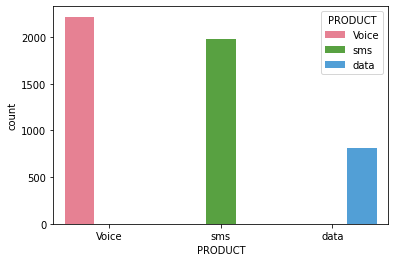

In [ ]:
#plot product parameters

product=sns.countplot(x="PRODUCT", data=df1, palette='husl', hue="PRODUCT")

#calculating voice,sms,data observation

print(df1['PRODUCT'].value_counts())

Regions with the highest traffic

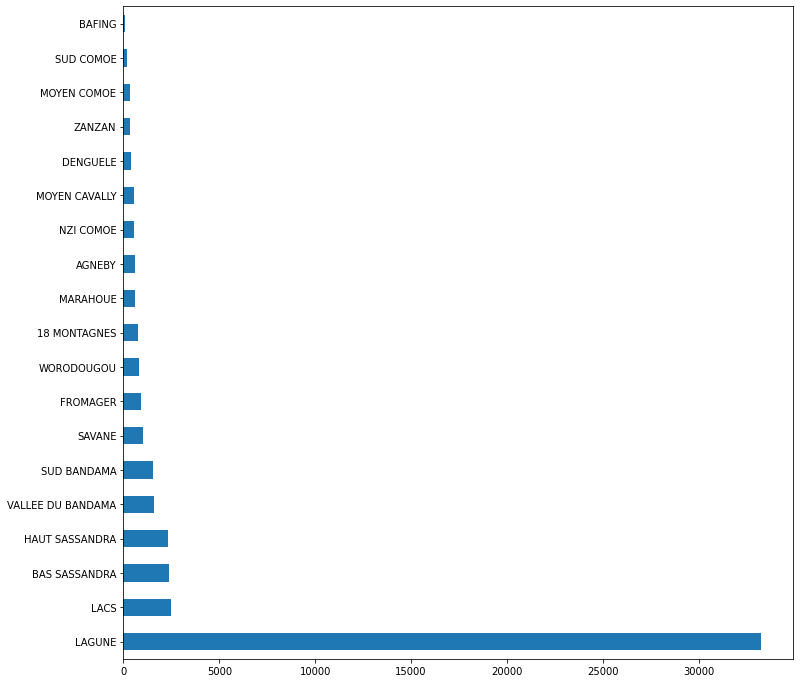

In [ ]:
merged_df['REGION'].value_counts().plot(kind='barh',  figsize=(12,12))


Area with the highest traffic

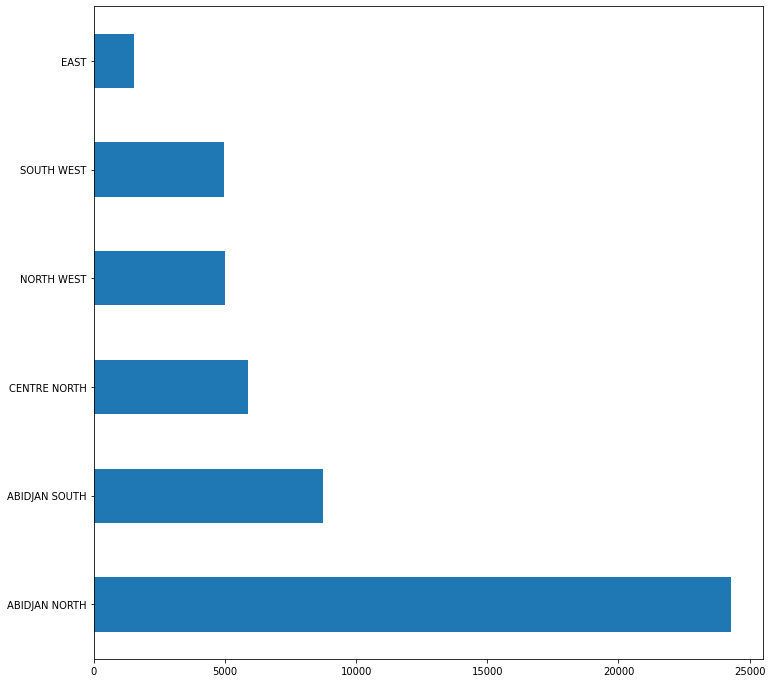

In [ ]:
merged_df['AREA'].value_counts().plot(kind='barh',  figsize=(12,12))


RECOMMENDATION

In [ ]:
The regions with the highest traffic were;
AGUNE               33261
LACS                  2484
BAS SASSANDRA         2395
HAUT SASSANDRA        2304
VALLEE DU BANDAMA     1575
SUD BANDAMA           1533
SAVANE                 997
FROMAGER               916

#Therefore,the company should focus their upgrade in these regions.
